In [1]:
import numpy as np
from numpy.random import RandomState
import copy
import os
import matplotlib.pyplot as plt
# import multiprocessing
import matplotlib.ticker as mticker
from scipy import stats
import math



#Make this notebook wider
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore') #Quiet down python


In [2]:
def ShrinkageError(OptReg,Eigenvalues,Shrinkage):
    
    return(OptReg*( (1./OptReg + 1./Eigenvalues)*((Shrinkage - OptReg/(Eigenvalues + OptReg))**2)).mean() )

In [3]:
def GradientDescentShrinker(Stepsize,Iterations,Eigenvalues):
    return((1.-Stepsize*Eigenvalues)**(Iterations))
def RidgeRegressionShrinker(Regularisation,Eigenvalues):
    return(Regularisation/(Eigenvalues + Regularisation))
def SubOptRatio(k,lambda_min,OptReg,Rank,alpha):
    Eigenvalues = (1./(np.arange(Rank) + 1.)**alpha)
    Stepsize = 1./(k * lambda_min)
    GradientDescentError = np.zeros(k)
    RidgeRegressionError = np.zeros(k)
    RidgeRegression_Regularisations = np.linspace(lambda_min,1,k)
    
    for i in np.arange(k):
        TmpShrinker = GradientDescentShrinker(Stepsize,i+1,Eigenvalues)    
        GradientDescentError[i] = ShrinkageError(OptReg,Eigenvalues,TmpShrinker)
        TmpShrinker = RidgeRegressionShrinker(RidgeRegression_Regularisations[i],Eigenvalues)
        RidgeRegressionError[i] = ShrinkageError(OptReg,Eigenvalues,TmpShrinker)
    return(GradientDescentError.min()/RidgeRegressionError.min())
def UpperBound(k,lambda_min,OptReg,Rank,alpha,const = 1.):
    delta = (1-lambda_min)/(k-1)
    epsilon = (OptReg-lambda_min)/delta - np.floor((OptReg-lambda_min)/delta)
    if(alpha < 1./3):
        J_alpha =  1+ (k*lambda_min/OptReg*OptReg)**(1./alpha - 3)
    elif(alpha == 1./3):
        J_alpha = 1 + 3*np.log(k*lambda_min/OptReg)
    elif(alpha > 1./3):
        J_alpha = 1+ OptReg**(3-1./alpha)/(3*alpha - 1)
    Tmp = (k*k/(Rank**(1-alpha)))*(1./OptReg**(1./alpha - 1) + J_alpha ) + (OptReg*OptReg/lambda_min )**2
    Dist_lambda = np.min([epsilon,1-epsilon])**2
    return(const*Tmp/(Dist_lambda*(1-lambda_min)*(1-lambda_min) ))
def LowerBound(k,lambda_min,OptReg,Rank,alpha,const = 1.):
    delta = (1-lambda_min)/(k-1)
    epsilon = (OptReg-lambda_min)/delta - np.floor((OptReg-lambda_min)/delta)
    Dist_lambda = np.min([epsilon,1-epsilon])**2
    
    Stepsize = 1./(k * lambda_min)
    kappa = 1./(Stepsize*OptReg) - np.floor(1./(Stepsize*OptReg))
    Tmp = (np.min([kappa,1-kappa])**2)/(Dist_lambda*(1-lambda_min)*(1-lambda_min))
    
    Tmp2 = 2*((4*k*lambda_min/(kappa*OptReg*OptReg))**(1./alpha - 1))/((1-alpha)*(Rank**(1-alpha)))
    return( ((OptReg*OptReg/lambda_min )**2)*Tmp*(1-Tmp2)*const )

Opt Reg :  1 / 100
Opt Reg :  2 / 100
Opt Reg :  3 / 100
Opt Reg :  4 / 100
Opt Reg :  5 / 100
Opt Reg :  6 / 100
Opt Reg :  7 / 100
Opt Reg :  8 / 100
Opt Reg :  9 / 100
Opt Reg :  10 / 100
Opt Reg :  11 / 100
Opt Reg :  12 / 100
Opt Reg :  13 / 100
Opt Reg :  14 / 100
Opt Reg :  15 / 100
Opt Reg :  16 / 100
Opt Reg :  17 / 100
Opt Reg :  18 / 100
Opt Reg :  19 / 100
Opt Reg :  20 / 100
Opt Reg :  21 / 100
Opt Reg :  22 / 100
Opt Reg :  23 / 100
Opt Reg :  24 / 100
Opt Reg :  25 / 100
Opt Reg :  26 / 100
Opt Reg :  27 / 100
Opt Reg :  28 / 100
Opt Reg :  29 / 100
Opt Reg :  30 / 100
Opt Reg :  31 / 100
Opt Reg :  32 / 100
Opt Reg :  33 / 100
Opt Reg :  34 / 100
Opt Reg :  35 / 100
Opt Reg :  36 / 100
Opt Reg :  37 / 100
Opt Reg :  38 / 100
Opt Reg :  39 / 100
Opt Reg :  40 / 100
Opt Reg :  41 / 100
Opt Reg :  42 / 100
Opt Reg :  43 / 100
Opt Reg :  44 / 100
Opt Reg :  45 / 100
Opt Reg :  46 / 100
Opt Reg :  47 / 100
Opt Reg :  48 / 100
Opt Reg :  49 / 100
Opt Reg :  50 / 100
Opt Reg :

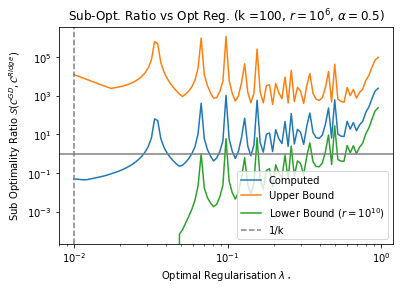

In [4]:

k=100

OptReg_len = 100
OptReg_list = 10**(np.linspace(0,-2,OptReg_len))
alpha_test = np.array([0.5])
Rank = 10**(6.)

Ratios_store = np.zeros((len(alpha_test),OptReg_len))
UpperBound_store = np.zeros((len(alpha_test),OptReg_len))
LowerBound_store = np.zeros((len(alpha_test),OptReg_len))

for i in np.arange(len(alpha_test)):
    alpha = alpha_test[i]
    for j in np.arange(OptReg_len):
        print("Opt Reg :  " + str(j+1) + " / " + str(OptReg_len))
        lambda_min = 0.71245212*OptReg_list[j]
        Ratios_store[i,j] = SubOptRatio(k,lambda_min,OptReg_list[j],Rank,alpha)
        UpperBound_store[i,j] = UpperBound(k,lambda_min,OptReg_list[j],Rank,alpha)
        LowerBound_store[i,j] = LowerBound(k,lambda_min,OptReg_list[j],10**10,alpha)
        
    plt.plot(OptReg_list,Ratios_store[i],label=r"Computed")
    plt.plot(OptReg_list,UpperBound_store[i],label=r"Upper Bound")
    plt.plot(OptReg_list,LowerBound_store[i],label=r"Lower Bound" + r" $(r= 10^{10})$")
plt.axvline(1./k,color="grey",label="1/k",ls="--")
plt.axhline(1,color="grey")
plt.legend()
plt.xscale("log")
plt.yscale("log")

plt.title("Sub-Opt. Ratio vs Opt Reg. (k =" + str(k) + r", $r = 10^6$" + ", " + r"$\alpha = $"  + str(alpha) + ")")
plt.xlabel("Optimal Regularisation " + r"$\lambda_\star$")
plt.ylabel("Sub Optimality Ratio " + r"$\mathcal{S}(\mathcal{C}^{GD},\mathcal{C}^{Ridge})$")
plt.show()



In [7]:
np.savetxt("IEEPlots/Evaluate_UpperLower_Bounds/OptReg_list.csv",OptReg_list,delimiter=",")
np.savetxt("IEEPlots/Evaluate_UpperLower_Bounds/UpperBound.csv",UpperBound_store,delimiter=",")
np.savetxt("IEEPlots/Evaluate_UpperLower_Bounds/LowerBound.csv",LowerBound_store,delimiter=",")
np.savetxt("IEEPlots/Evaluate_UpperLower_Bounds/alpha_test.csv",alpha_test,delimiter=",")
np.savetxt("IEEPlots/Evaluate_UpperLower_Bounds/Ratios_store.csv",Ratios_store,delimiter=",")

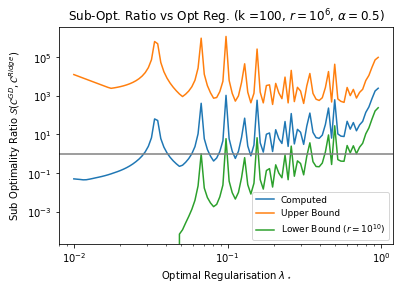

In [9]:
for i in np.arange(len(alpha_test)):
    alpha = alpha_test[i]
        
    plt.plot(OptReg_list,Ratios_store[i],label=r"Computed")
    plt.plot(OptReg_list,UpperBound_store[i],label=r"Upper Bound")
    plt.plot(OptReg_list,LowerBound_store[i],label=r"Lower Bound" + r" $(r= 10^{10})$")
# plt.axvline(1./k,color="grey",label="1/k",ls="--")
plt.axhline(1,color="grey")
plt.legend(prop={'size': 9})
plt.xscale("log")
plt.yscale("log")

plt.title("Sub-Opt. Ratio vs Opt Reg. (k =" + str(k) + r", $r = 10^6$" + ", " + r"$\alpha = $"  + str(alpha) + ")")
plt.xlabel("Optimal Regularisation " + r"$\lambda_\star$")
plt.ylabel("Sub Optimality Ratio " + r"$\mathcal{S}(\mathcal{C}^{GD},\mathcal{C}^{Ridge})$")
# plt.savefig("new_greyostrich_exp/Upper_Lowerbound_Computed_2.pdf",dpi=128,bbox_inches="tight",pad_inches = 0)

plt.show()
